In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('iteration 4').getOrCreate()

import matplotlib.pyplot as plt
import seaborn


In [2]:
df = spark.read.load('./sy2.csv', inferSchema=True, format = 'csv', header = 'true')

In [3]:
df.show(10)
df.printSchema()
df.count()

+---+----+-----+---+----+-----+----+----+----+----+----+----+------+-----+----+---+----+-------+
| No|year|month|day|hour|PM2.5|PM10| SO2| NO2|  CO|  O3|TEMP|  PRES| DEWP|RAIN| wd|WSPM|station|
+---+----+-----+---+----+-----+----+----+----+----+----+----+------+-----+----+---+----+-------+
|  1|2013|    3|  1|   0|  3.0| 6.0| 3.0| 8.0| 300|44.0|-0.9|1025.8|-20.5| 0.0| NW| 9.3| Shunyi|
|  2|2013|    3|  1|   1| 12.0|12.0| 3.0| 7.0| 300|47.0|-1.1|1026.1|-21.3| 0.0| NW| 9.4| Shunyi|
|  3|2013|    3|  1|   2| 14.0|14.0|null| 7.0| 200|22.0|-1.7|1026.2|-23.0| 0.0| NW| 8.6| Shunyi|
|  4|2013|    3|  1|   3| 12.0|12.0| 3.0| 5.0|null|null|-2.1|1027.3|-23.3| 0.0| NW| 6.6| Shunyi|
|  5|2013|    3|  1|   4| 12.0|12.0| 3.0|null| 200|11.0|-2.4|1027.7|-22.9| 0.0| NW| 4.5| Shunyi|
|  6|2013|    3|  1|   5| 11.0|11.0| 3.0| 7.0| 200|45.0|-2.8|1028.2|-22.1| 0.0|NNW| 1.7| Shunyi|
|  7|2013|    3|  1|   6| 12.0|12.0| 3.0| 9.0| 300|74.0|-4.0|1029.0|-21.2| 0.0|NNE| 1.6| Shunyi|
|  8|2013|    3|  1|   7| 13.0

35064

Text(0,0.5,'frequncy')

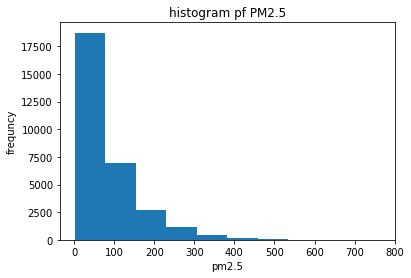

In [4]:
data = df.withColumnRenamed('PM2.5', 'PM')
datap = data.toPandas()
fig, ax = plt.subplots()
ax.hist(datap.dropna()['PM'])
ax.set_title('histogram pf PM2.5')
ax.set_xlabel('pm2.5')
ax.set_ylabel('frequncy')



In [5]:
print(datap.corr()['PM'])

No      -0.015254
year    -0.009634
month   -0.021747
day     -0.003308
hour     0.012725
PM       1.000000
PM10     0.900479
SO2      0.462489
NO2      0.643631
CO       0.782033
O3      -0.134627
TEMP    -0.115991
PRES    -0.002374
DEWP     0.125071
RAIN    -0.007250
WSPM    -0.270763
Name: PM, dtype: float64


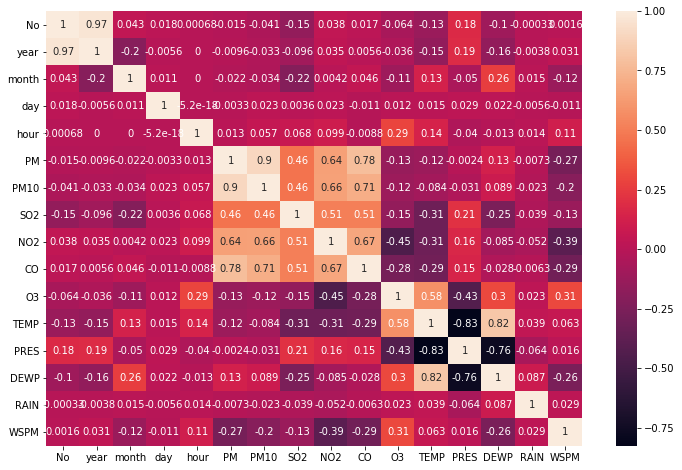

In [6]:
PM_corr = datap.corr()
fig = plt.figure(figsize=(12,8))
seaborn.heatmap(PM_corr, annot=True)

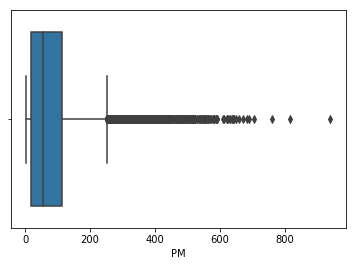

In [7]:
seaborn.boxplot('PM',data = datap)

In [8]:
print(datap.info())
print(datap.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
No         35064 non-null int64
year       35064 non-null int64
month      35064 non-null int64
day        35064 non-null int64
hour       35064 non-null int64
PM         34151 non-null float64
PM10       34516 non-null float64
SO2        33768 non-null float64
NO2        33699 non-null float64
CO         32886 non-null float64
O3         33575 non-null float64
TEMP       35013 non-null float64
PRES       35013 non-null float64
DEWP       35010 non-null float64
RAIN       35013 non-null float64
wd         34581 non-null object
WSPM       35020 non-null float64
station    35064 non-null object
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None
                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637    

In [9]:
data = data.na.drop()
data.count()
datap = data.toPandas()
print(datap.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30194 entries, 0 to 30193
Data columns (total 18 columns):
No         30194 non-null int64
year       30194 non-null int64
month      30194 non-null int64
day        30194 non-null int64
hour       30194 non-null int64
PM         30194 non-null float64
PM10       30194 non-null float64
SO2        30194 non-null float64
NO2        30194 non-null float64
CO         30194 non-null int64
O3         30194 non-null float64
TEMP       30194 non-null float64
PRES       30194 non-null float64
DEWP       30194 non-null float64
RAIN       30194 non-null float64
wd         30194 non-null object
WSPM       30194 non-null float64
station    30194 non-null object
dtypes: float64(10), int64(6), object(2)
memory usage: 4.1+ MB
None


In [10]:
import pandas
datap = data.toPandas()
from sklearn.feature_selection import SelectKBest, f_regression
columns = ['month','day','hour','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
target = 'PM'
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(datap[columns], datap[target])
dfscores = pandas.DataFrame(fit.scores_)
dfcolumns = pandas.DataFrame(datap[columns].columns)

featureScores = pandas.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(10,'Score'))


    Specs         Score
5      CO  50265.425103
4     NO2  23201.834657
3     SO2   8511.098914
11   WSPM   2574.751813
9    DEWP    633.456857
6      O3    605.789353
7    TEMP    343.865523
0   month     11.208099
2    hour      6.283775
8    PRES      5.639531


In [11]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(
    inputCols=["CO", "NO2", "SO2",'WSPM','DEWP','O3','TEMP','month','hour','PRES'],
    outputCol="features")
output = assembler.transform(data)
output.printSchema()
final_data = output.select("features",'PM')
final_data.head()

root
 |-- No: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- PM: double (nullable = true)
 |-- PM10: double (nullable = true)
 |-- SO2: double (nullable = true)
 |-- NO2: double (nullable = true)
 |-- CO: integer (nullable = true)
 |-- O3: double (nullable = true)
 |-- TEMP: double (nullable = true)
 |-- PRES: double (nullable = true)
 |-- DEWP: double (nullable = true)
 |-- RAIN: double (nullable = true)
 |-- wd: string (nullable = true)
 |-- WSPM: double (nullable = true)
 |-- station: string (nullable = true)
 |-- features: vector (nullable = true)



Row(features=DenseVector([300.0, 8.0, 3.0, 9.3, -20.5, 44.0, -0.9, 3.0, 0.0, 1025.8]), PM=3.0)

In [12]:
from pyspark.ml.feature import MinMaxScaler
scaler = MinMaxScaler( min=0, max=100, inputCol="features", outputCol="scaledFeatures",)
scalerModel = scaler.fit(final_data)
scaledData = scalerModel.transform(final_data)
print("Features scaled to range: [%f, %f]" % (scaler.getMin(), scaler.getMax()))
scaledData.head(5)

Features scaled to range: [0.000000, 100.000000]


[Row(features=DenseVector([300.0, 8.0, 3.0, 9.3, -20.5, 44.0, -0.9, 3.0, 0.0, 1025.8]), PM=3.0, scaledFeatures=DenseVector([2.0202, 2.3438, 0.9709, 72.6562, 24.4094, 12.8863, 28.4946, 18.1818, 0.0, 68.9781])),
 Row(features=DenseVector([300.0, 7.0, 3.0, 9.4, -21.3, 47.0, -1.1, 3.0, 1.0, 1026.1]), PM=12.0, scaledFeatures=DenseVector([2.0202, 1.9531, 0.9709, 73.4375, 23.1496, 13.7692, 28.1362, 18.1818, 4.3478, 69.5255])),
 Row(features=DenseVector([200.0, 7.0, 3.0, 1.7, -22.1, 45.0, -2.8, 3.0, 5.0, 1028.2]), PM=11.0, scaledFeatures=DenseVector([1.0101, 1.9531, 0.9709, 13.2812, 21.8898, 13.1806, 25.0896, 18.1818, 21.7391, 73.3577])),
 Row(features=DenseVector([300.0, 9.0, 3.0, 1.6, -21.2, 74.0, -4.0, 3.0, 6.0, 1029.0]), PM=12.0, scaledFeatures=DenseVector([2.0202, 2.7344, 0.9709, 12.5, 23.3071, 21.7154, 22.9391, 18.1818, 26.087, 74.8175])),
 Row(features=DenseVector([300.0, 23.0, 3.0, 1.7, -21.3, 59.0, -2.4, 3.0, 7.0, 1030.5]), PM=13.0, scaledFeatures=DenseVector([2.0202, 8.2031, 0.9709, 

In [13]:
final_data = scaledData.select("scaledFeatures",'PM')
final_data = final_data.withColumnRenamed('scaledFeatures', 'features')
final_data.head(20)

[Row(features=DenseVector([2.0202, 2.3438, 0.9709, 72.6562, 24.4094, 12.8863, 28.4946, 18.1818, 0.0, 68.9781]), PM=3.0),
 Row(features=DenseVector([2.0202, 1.9531, 0.9709, 73.4375, 23.1496, 13.7692, 28.1362, 18.1818, 4.3478, 69.5255]), PM=12.0),
 Row(features=DenseVector([1.0101, 1.9531, 0.9709, 13.2812, 21.8898, 13.1806, 25.0896, 18.1818, 21.7391, 73.3577]), PM=11.0),
 Row(features=DenseVector([2.0202, 2.7344, 0.9709, 12.5, 23.3071, 21.7154, 22.9391, 18.1818, 26.087, 74.8175]), PM=12.0),
 Row(features=DenseVector([2.0202, 8.2031, 0.9709, 13.2812, 23.1496, 17.3008, 25.8065, 18.1818, 30.4348, 77.5547]), PM=13.0),
 Row(features=DenseVector([3.0303, 6.6406, 0.9709, 21.0938, 22.3622, 19.361, 28.3154, 18.1818, 34.7826, 78.8321]), PM=8.0),
 Row(features=DenseVector([3.0303, 7.4219, 0.9709, 6.25, 20.6299, 17.5951, 30.1075, 18.1818, 39.1304, 79.0146]), PM=3.0),
 Row(features=DenseVector([3.0303, 7.8125, 0.9709, 19.5312, 22.6772, 18.7724, 31.362, 18.1818, 43.4783, 79.0146]), PM=3.0),
 Row(featu

In [14]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

In [15]:
train_data,test_data = final_data.randomSplit([0.7,0.3])

In [16]:
lr = LinearRegression(labelCol='PM')
lrModel = lr.fit(train_data)
lr_predictions = lrModel.transform(test_data)
lr_predictions.select("prediction","PM").show(10)
print("Intercept: {}".format(lrModel.intercept))
columns = ["CO", "NO2", "SO2",'WSPM','DEWP','O3','TEMP','month','hour','PRES']
df = pandas.DataFrame({'attributes': columns, 'coefficient': lrModel.coefficients,})

print(df)
test_results = lrModel.evaluate(test_data)
print('Model: linear regression')
print("RSME: {}".format(test_results.rootMeanSquaredError))
print("R2: {}".format(test_results.r2))
test_results.residuals.show()



+-------------------+-----+
|         prediction|   PM|
+-------------------+-----+
| 3.9550976439305003|  9.0|
|   4.71093032911056|  7.0|
|-24.347589093881467|  7.0|
|  4.278149391469299|  3.0|
|-14.024022563898633|  3.0|
| 3.0450585038695905|282.0|
|  8.828183111206009|107.0|
| -7.609379312132106| 23.0|
| 3.2569243792466764|  5.0|
|-6.8194420095391095|  3.0|
+-------------------+-----+
only showing top 10 rows

Intercept: -55.79743030256416
  attributes  coefficient
0         CO     3.862229
1        NO2     2.219173
2        SO2     0.471525
3       WSPM     0.465115
4       DEWP     1.206100
5         O3     0.944169
6       TEMP    -0.646392
7      month    -0.158081
8       hour    -0.121299
9       PRES     0.146018
Model: linear regression
RSME: 43.42530643934919
R2: 0.715699699751002
+-------------------+
|          residuals|
+-------------------+
|    5.0449023560695|
| 2.2890696708894396|
| 31.347589093881467|
|-1.2781493914692987|
| 17.024022563898633|
|  278.954941496130

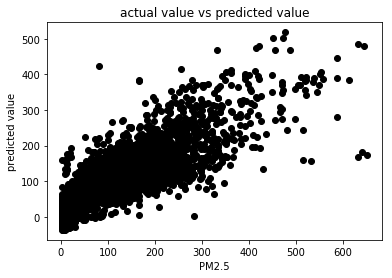

In [17]:
lrp = lr_predictions.toPandas()

plt.plot(lrp['PM'],lrp['prediction'],'o', color='black') 
plt.title('actual value vs predicted value')
plt.xlabel('PM2.5')
plt.ylabel('predicted value')
plt.show()

In [18]:
rf = RandomForestRegressor(featuresCol="features", labelCol = 'PM')
rf_model = rf.fit(train_data)

rf_predictions = rf_model.transform(test_data)
rf_evaluator = RegressionEvaluator(
    labelCol="PM", predictionCol="prediction")
rf_predictions.select("prediction","PM").show(10)
df = pandas.DataFrame({'attributes': columns, 'feature Importances': rf_model.featureImportances,})
print('# of trees:', rf_model.getNumTrees)
print(df)
print('Model: Random forest Regressor')
print('RMSE:', rf_evaluator.evaluate(rf_predictions, {rf_evaluator.metricName: "rmse"}))
print('R2:', rf_evaluator.evaluate(rf_predictions, {rf_evaluator.metricName: "r2"}))

+------------------+-----+
|        prediction|   PM|
+------------------+-----+
|13.380400499262525|  9.0|
|11.431856723358248|  7.0|
|23.731028393003363|  7.0|
|21.243091847999743|  3.0|
|15.580615971255417|  3.0|
|18.006482684083643|282.0|
|17.726870430499325|107.0|
|13.787479016940935| 23.0|
|11.431856723358248|  5.0|
|11.431856723358248|  3.0|
+------------------+-----+
only showing top 10 rows

# of trees: 20
  attributes  feature Importances
0         CO             0.545283
1        NO2             0.234105
2        SO2             0.080964
3       WSPM             0.003219
4       DEWP             0.064641
5         O3             0.033545
6       TEMP             0.020017
7      month             0.012071
8       hour             0.001249
9       PRES             0.004906
Model: Random forest Regressor
RMSE: 42.73672545264354
R2: 0.7246443320784135


Text(0,0.5,'predicted value')

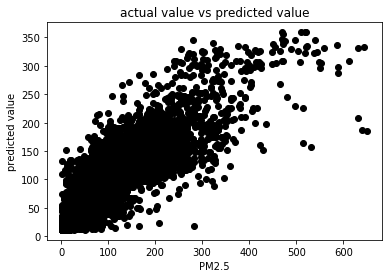

In [19]:

rfp = rf_predictions.toPandas()
plt.plot(rfp['PM'],rfp['prediction'],'o', color='black') 
plt.title('actual value vs predicted value')
plt.xlabel('PM2.5')
plt.ylabel('predicted value')

Root Mean Squared Error (RMSE) on test data = 44.2619
+------------------+-----+--------------------+
|        prediction|   PM|            features|
+------------------+-----+--------------------+
|10.859359698681732|  9.0|[0.0,0.0,3.883495...|
|10.859359698681732|  7.0|[0.0,0.390625,0.0...|
|10.859359698681732|  7.0|[0.0,0.390625,0.9...|
|10.859359698681732|  3.0|[0.0,0.78125,0.0,...|
|10.859359698681732|  3.0|[0.0,0.78125,0.48...|
|18.723233030090974|282.0|[0.0,0.78125,0.48...|
|18.723233030090974|107.0|[0.0,0.78125,0.48...|
|18.723233030090974| 23.0|[0.0,0.78125,0.48...|
|10.859359698681732|  5.0|[0.0,0.78125,0.48...|
|10.859359698681732|  3.0|[0.0,0.78125,0.48...|
|10.859359698681732| 17.0|[0.0,0.78125,0.48...|
|10.859359698681732|  8.0|[0.0,0.78125,0.97...|
|10.859359698681732| 12.0|[0.0,0.78125,0.97...|
|10.859359698681732| 83.0|[0.0,0.78125,1.45...|
|10.859359698681732|  9.0|[0.0,0.78125,3.39...|
|10.859359698681732|  3.0|[0.0,1.171875,0.0...|
|10.859359698681732|  3.0|[0.0,1.1

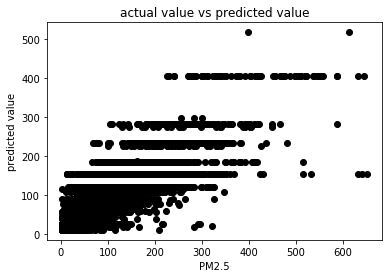

In [20]:
from pyspark.ml.regression import DecisionTreeRegressor

dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'PM')
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)
dt_evaluator = RegressionEvaluator(
    labelCol="PM", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
dt_model.featureImportances

dtp = dt_predictions.toPandas()
import matplotlib.pyplot as plt
plt.plot(dtp['PM'],dtp['prediction'],'o', color='black') 
plt.title('actual value vs predicted value')
plt.xlabel('PM2.5')
plt.ylabel('predicted value')
dt_predictions.select("prediction","PM","features").show(20)
plt.show()

In [21]:
rf_predictions.select("features","PM").show(10)

+--------------------+-----+
|            features|   PM|
+--------------------+-----+
|[0.0,0.0,3.883495...|  9.0|
|[0.0,0.390625,0.0...|  7.0|
|[0.0,0.390625,0.9...|  7.0|
|[0.0,0.78125,0.0,...|  3.0|
|[0.0,0.78125,0.48...|  3.0|
|[0.0,0.78125,0.48...|282.0|
|[0.0,0.78125,0.48...|107.0|
|[0.0,0.78125,0.48...| 23.0|
|[0.0,0.78125,0.48...|  5.0|
|[0.0,0.78125,0.48...|  3.0|
+--------------------+-----+
only showing top 10 rows

